In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartiflette import carti_download
import plotly.express as px

In [7]:
df_patientele = pd.read_csv("Bases de données/Données_Patientele_Departementale.csv", sep=";")
df_patientele['nombre_patients_uniques'] = pd.to_numeric(df_patientele['nombre_patients_uniques'],errors='coerce')
df_patientele.columns = df_patientele.columns.str.replace("\ufeff", "", regex=False).str.strip()

df_patientele_2017 = df_patientele[(df_patientele['annee'] == 2017) & (df_patientele['profession_sante'] == "Médecins généralistes (hors médecins à expertise particulière - MEP)")]           

In [8]:
df_patientele.head()

,annee,profession_sante,region,libelle_region,departement,libelle_departement,nombre_patients_uniques,nombre_patients_medecin_traitant,vision generale all,vision_generale_prescriptions,vision profession territoire,patients_medecin_traitant_integer,patients_uniques_integer
0,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,39,Jura,1309.0,NC,oui,oui,oui,NaN,1309.0
1,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,58,Nièvre,2123.0,NC,oui,oui,oui,NaN,2123.0
2,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,89,Yonne,3634.0,NC,oui,oui,oui,NaN,3634.0
3,2017,Anesthésistes-réanimateurs,28,Normandie,14,Calvados,2512.0,NC,oui,oui,oui,NaN,2512.0
4,2017,Anesthésistes-réanimateurs,28,Normandie,76,Seine-Maritime,2938.0,NC,oui,oui,oui,NaN,2938.0


## Carte des pays différents

(np.float64(-5.876307480152819),
 np.float64(10.295160325375349),
 np.float64(40.84582809366395),
 np.float64(51.57675902873196))

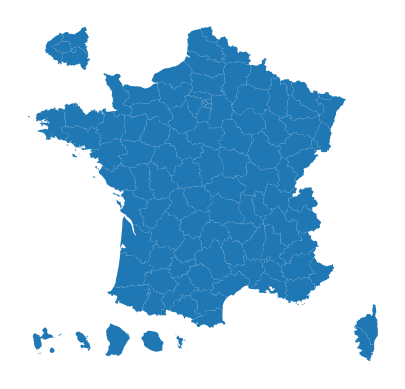

In [9]:
# Téléchargement des informations géospatiales des départements français (DROM compris)

departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# On modifie le code des départements : on rajoute un 0 à ceux qui ont un code à deux chiffres
# departements['INSEE_DEP'] = departements['INSEE_DEP'].str.zfill(3)

# Test d'affichage de la carte
departements.plot().axis('off')

In [10]:
Carte_2017 = df_patientele_2017.copy()
Carte_2017['INSEE_DEP'] = Carte_2017['departement'].str[:3].astype(str)
Carte_2017 = departements.merge(Carte_2017, on='INSEE_DEP', how='left')

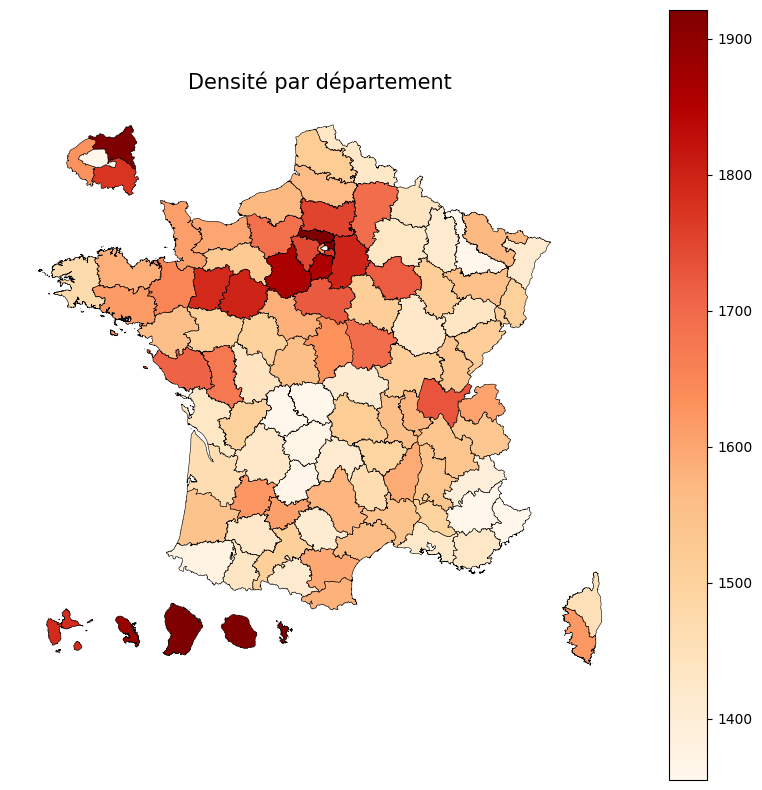

In [11]:
# Tracé pour l'année 2017

vmin = Carte_2017['nombre_patients_uniques'].quantile(0.05)
vmax = Carte_2017['nombre_patients_uniques'].quantile(0.95)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Carte_2017.plot(
    column='nombre_patients_uniques', 
    cmap='OrRd',
    vmin=vmin,
    vmax=vmax,      
    linewidth=0.4,
    edgecolor='black',
    legend=True,       
    ax=ax
)

# On supprime les axes
ax.axis('off')  
ax.set_title("Densité par département", fontsize=15)
plt.show()

## Graphique Evolution par année

In [12]:
df_medecin = df_patientele[(df_patientele['profession_sante'] == "Médecins généralistes (hors médecins à expertise particulière - MEP)")]  
df_graphique_évol = df_medecin[["annee","libelle_departement","patients_uniques_integer"]]
df_graphique_évol.info

<bound method DataFrame.info of        annee libelle_departement  patients_uniques_integer
414     2017          Guadeloupe                    1788.0
415     2017    Tout département                    2579.0
416     2017    Tout département                    2134.0
417     2017             Mayotte                    3166.0
418     2017               Paris                    1355.0
...      ...                 ...                       ...
39818   2024         Puy-de-Dôme                    1548.0
39819   2024               Rhône                    1699.0
39820   2024    Tout département                    1569.0
39821   2024     Alpes-Maritimes                    1605.0
39822   2024                 Var                    1594.0

[1080 rows x 3 columns]>

/tmp/ipykernel_156860/3048318879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annee'] = pd.to_numeric(df['annee'],errors='coerce')
/tmp/ipykernel_156860/3048318879.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


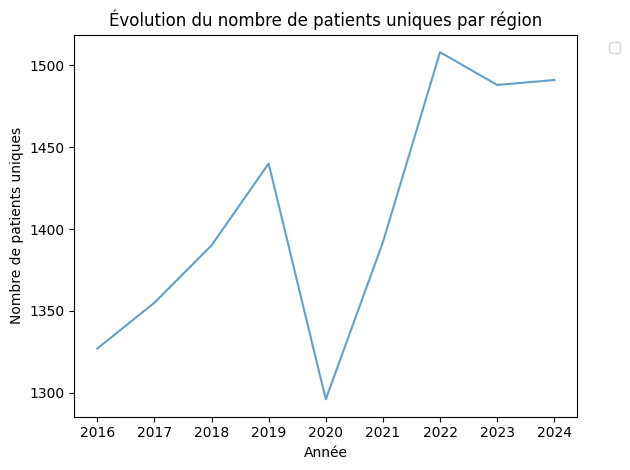

,annee,libelle_departement,patients_uniques_integer
15797,2016,Paris,1327.0
418,2017,Paris,1355.0
7546,2018,Paris,1390.0
4435,2019,Paris,1440.0
2551,2020,Paris,1296.0
4835,2021,Paris,1392.0
29530,2022,Paris,1508.0
12807,2023,Paris,1488.0
14357,2024,Paris,1491.0


In [13]:
L = []

df = df_graphique_évol[df_graphique_évol["libelle_departement"] == "Paris"]
df['annee'] = pd.to_numeric(df['annee'],errors='coerce')
df = df.sort_values(by='annee')
df.head()
plt.plot(df['annee'],
        df['patients_uniques_integer'],
        alpha=0.7
    )

plt.xlabel("Année")
plt.ylabel("Nombre de patients uniques")
plt.title("Évolution du nombre de patients uniques par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


df.head(10)

/tmp/ipykernel_156860/4190106649.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


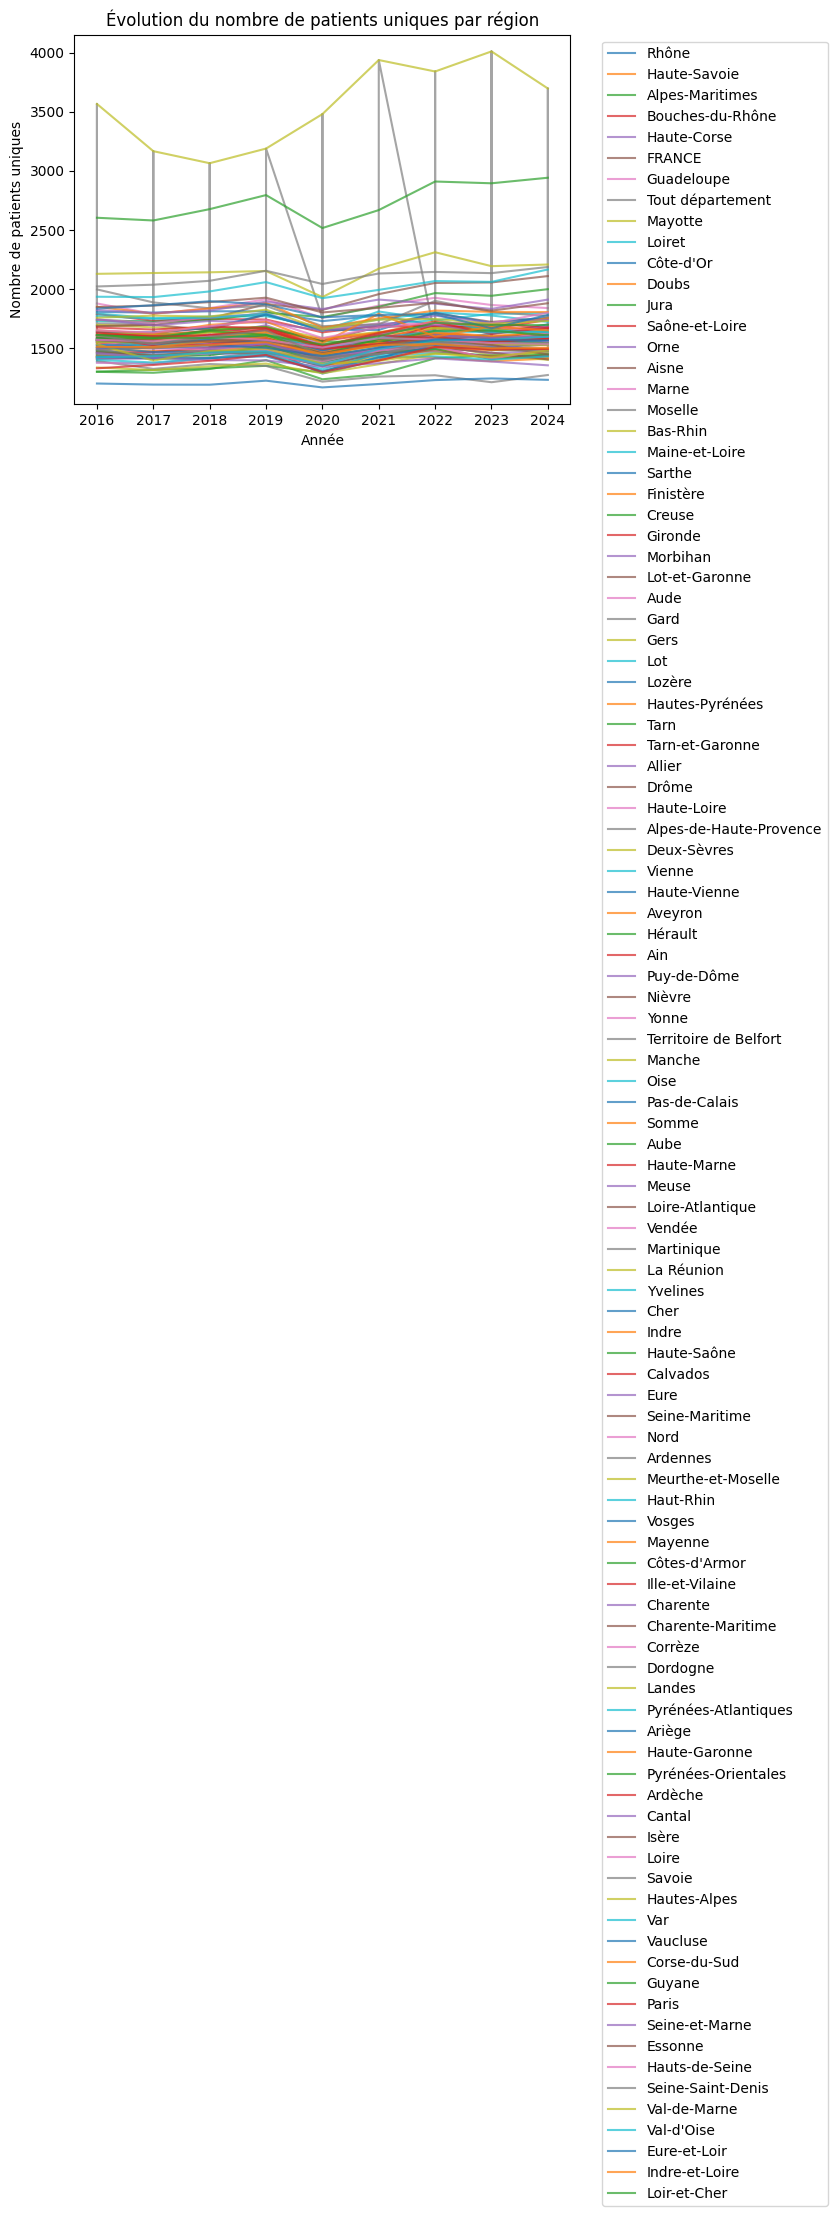

annee
2016    1
2017    1
2018    1
2019    1
2020    1
2021    1
2022    1
2023    1
2024    1
Name: count, dtype: int64

In [14]:
df_graphique_évol = df_graphique_évol.sort_values(by='annee')

for region in df_graphique_évol['libelle_departement'].unique():
    tmp = df_graphique_évol[df_graphique_évol['libelle_departement'] == region]
    plt.plot(
        tmp['annee'],
        tmp['patients_uniques_integer'],
        label=region,
        alpha=0.7
    )

plt.xlabel("Année")
plt.ylabel("Nombre de patients uniques")
plt.title("Évolution du nombre de patients uniques par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
df.head(10)
df.shape
df['annee'].value_counts().sort_index()

In [15]:
df = pd.read_excel("Bases de données/medecins_commune_2025.xlsx")
df.head(10)

,Cartographie Interactive de la Démographie Médicale,Unnamed: 1,Unnamed: 2
0,Référentiel géographique : France par commune ...,NaN,NaN
1,NaN,NaN,Indic1
2,Code,Libellé,"Les médecins généralistes, toutes activités et..."
3,01001,L'Abergement-Clémenciat,0
4,01002,L'Abergement-de-Varey,0
5,01004,Ambérieu-en-Bugey,30
6,01005,Ambérieux-en-Dombes,4
7,01006,Ambléon,0
8,01007,Ambronay,2
9,01008,Ambutrix,1


In [16]:
# code commune en string à 5 chiffres
df["Cartographie Interactive de la Démographie Médicale"] = df["Cartographie Interactive de la Démographie Médicale"].astype(str).str.zfill(5)

df.head()

,Cartographie Interactive de la Démographie Médicale,Unnamed: 1,Unnamed: 2
0,Référentiel géographique : France par commune ...,NaN,NaN
1,00nan,NaN,Indic1
2,0Code,Libellé,"Les médecins généralistes, toutes activités et..."
3,01001,L'Abergement-Clémenciat,0
4,01002,L'Abergement-de-Varey,0


In [17]:
gdf = carti_download(
    values=df.set_index("Cartographie Interactive de la Démographie Médicale")["Unnamed: 2"],
    level="COMMUNE",
    year=2023,
    simplify=True
)

There was an error while reading the file from the URL: https://minio.lab.sspcloud.fr/projet-cartiflette/production/provider=IGN/dataset_family=ADMINEXPRESS/source=EXPRESS-COG-TERRITOIRE/year=2023/administrative_level=COMMUNE/crs=2154/region=nan/vectorfile_format=geojson/territory=metropole/simplification=0/raw.geojson
Error message: '/vsimem/pyogrio_4267c4a7ebd94b5bbd81c4707411d070' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.
There was an error while reading the file from the URL: https://minio.lab.sspcloud.fr/projet-cartiflette/production/provider=IGN/dataset_family=ADMINEXPRESS/source=EXPRESS-COG-TERRITOIRE/year=2023/administrative_level=COMMUNE/crs=2154/region=Indic1/vectorfile_format=geojson/territory=metropole/simplification=0/raw.geojson
Error message: '/vsimem/pyogrio_6c466e76484a470988944d9a3cbe9968' not recognized as being in a supported file format.; 

KeyboardInterrupt: 

NameError: name 'gdf' is not defined

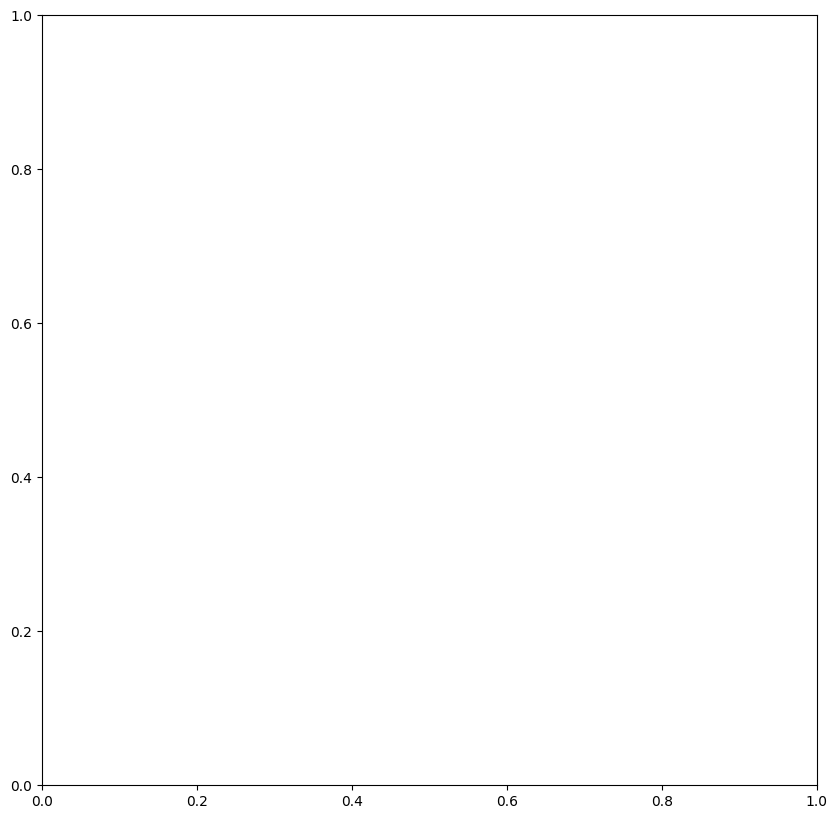

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf.plot(
    column="nb_medecins",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={
        "color": "lightgrey",
        "label": "Données manquantes"
    }
)

ax.set_title("Nombre de médecins par commune", fontsize=14)
ax.axis("off")

plt.show()


In [52]:
df_medecins_lieu_formation_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=5)
df_medecins_lieu_formation_complet.head()

df_medecins_lieu_formation= df_medecins_lieu_formation_complet[(df_medecins_lieu_formation_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_lieu_formation_complet['region'] == '00-Ensemble')
    & (df_medecins_lieu_formation_complet['specialites'] == '01-Médecine générale')
    ]
df_medecins_lieu_formation.head()
if (df_medecins_lieu_formation[['specialites', 'region', 'specialites_agregees']].nunique().eq(1).all()):
    df_medecins_lieu_formation.drop(columns=['specialites', 'region', 'specialites_agregees'],inplace=True)

df_medecins_lieu_formation.head()

/tmp/ipykernel_156860/987750368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_lieu_formation.drop(columns=['specialites', 'region', 'specialites_agregees'],inplace=True)


,region_diplome,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
2,00-Ensemble,101435,101385,101904,101935,101799,101755,101939,101381,101355,100621,99941,99457,99009,100019
20,01-Antilles-Guyane,80,112,144,185,247,291,350,394,453,502,538,581,646,709
38,11-Ile de France,22801,22615,22564,22263,21915,21513,21134,20590,20190,19765,19296,18870,18800,18699
56,24-Centre Val de Loire,2279,2288,2293,2274,2238,2209,2199,2172,2200,2168,2139,2138,2139,2149
74,27-Bourgogne Franche Comté,3758,3774,3786,3811,3817,3820,3833,3838,3811,3765,3747,3723,3711,3722


In [69]:
cols_effectifs = [c for c in df_medecins_lieu_formation.columns if c.startswith("effectif_")]
df_deltas = df_medecins_lieu_formation[cols_effectifs].diff(axis=1)
df_deltas.columns = [f"delta_{c.split('_')[1]}" for c in cols_effectifs]
df_deltas = df_deltas.drop(columns="delta_2012")
df = pd.concat([df_medecins_lieu_formation, df_deltas], axis=1)
df = df[df["region_diplome"] != "00-Ensemble"]
df.head()

,region_diplome,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,...,delta_2016,delta_2017,delta_2018,delta_2019,delta_2020,delta_2021,delta_2022,delta_2023,delta_2024,delta_2025
20,01-Antilles-Guyane,80,112,144,185,247,291,350,394,453,...,62,44,59,44,59,49,36,43,65,63
38,11-Ile de France,22801,22615,22564,22263,21915,21513,21134,20590,20190,...,-348,-402,-379,-544,-400,-425,-469,-426,-70,-101
56,24-Centre Val de Loire,2279,2288,2293,2274,2238,2209,2199,2172,2200,...,-36,-29,-10,-27,28,-32,-29,-1,1,10
74,27-Bourgogne Franche Comté,3758,3774,3786,3811,3817,3820,3833,3838,3811,...,6,3,13,5,-27,-46,-18,-24,-12,11
92,28-Normandie,4157,4176,4253,4284,4316,4313,4298,4279,4338,...,32,-3,-15,-19,59,-34,-35,-34,-27,91


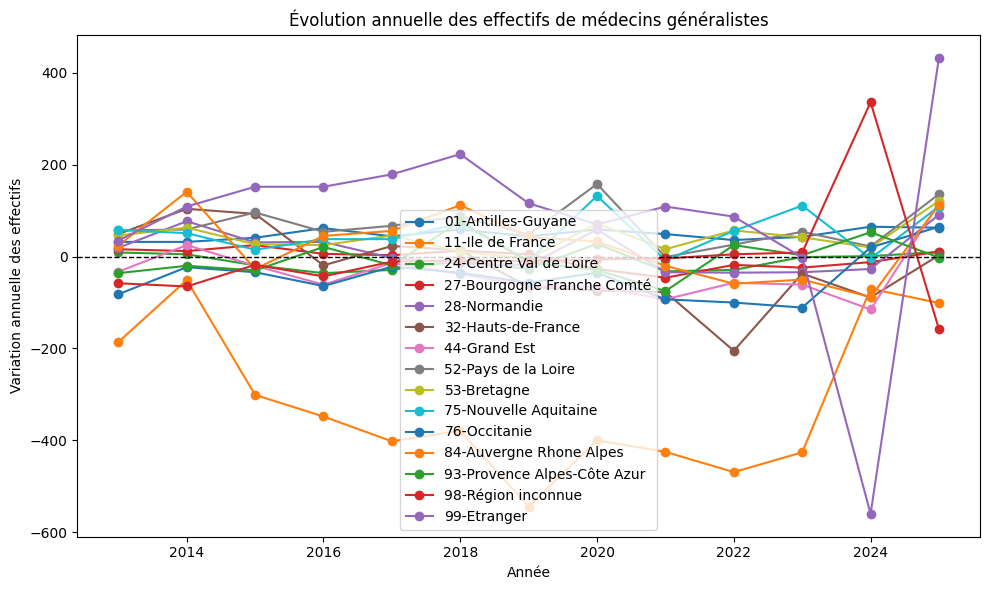

In [70]:
import matplotlib.pyplot as plt

delta_cols = [c for c in df.columns if c.startswith("delta_")]
years = [int(c.split("_")[1]) for c in delta_cols]

plt.figure(figsize=(10, 6))

for _, row in df.iterrows():
    plt.plot(
        years,
        row[delta_cols],
        marker="o",
        label=row["region_diplome"]
    )

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Année")
plt.ylabel("Variation annuelle des effectifs")
plt.title("Évolution annuelle des effectifs de médecins généralistes")
plt.legend()
plt.tight_layout()
plt.show()


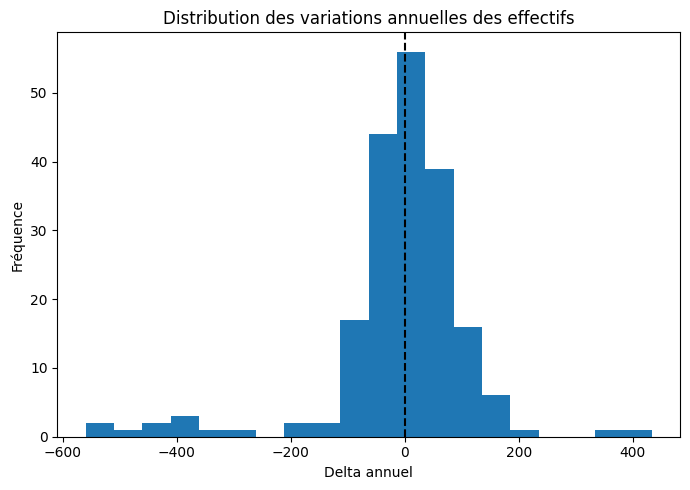

In [71]:
all_deltas = df[delta_cols].values.flatten()

plt.figure(figsize=(7, 5))
plt.hist(all_deltas, bins=20)
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Delta annuel")
plt.ylabel("Fréquence")
plt.title("Distribution des variations annuelles des effectifs")
plt.tight_layout()
plt.show()


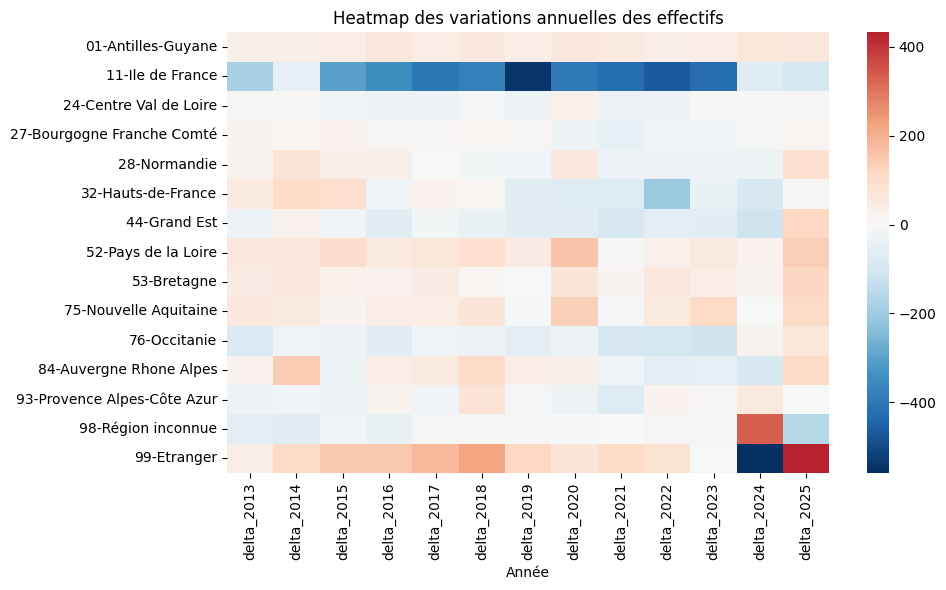

In [72]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.heatmap(
    df.set_index("region_diplome")[delta_cols],
    center=0,
    cmap="RdBu_r",
    annot=False
)

plt.title("Heatmap des variations annuelles des effectifs")
plt.xlabel("Année")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [73]:
df["delta_total"] = df["effectif_2025"] - df["effectif_2012"]